<a href="https://colab.research.google.com/github/hermelawesene/Quantum-Computing-tasks/blob/main/QC_Task_Hermela_Wesene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1: Forced Superposition**
Create a circuit with 2 qubits where

Qubit 0 is in state |+⟩ (superposition of |0⟩ and |1⟩).

Qubit 1 is in state |1⟩.

Entangle them so that measuring Qubit 0 always gives the opposite result of Qubit 1.

Verify with 1000 shots and plot the counts.

Hint: Use H, CX, and X gates.

In [2]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 21.4 MB/s eta 0:00:00


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # Correct import statement
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
# Create a quantum circuit with 2 qubits and 2 classical bits (for measurement)
qc = QuantumCircuit(2, 2)

In [3]:
# Step 1: Put Qubit 0 in superposition (|+⟩) with H gate
qc.h(0)

# Step 2: Set Qubit 1 to |1⟩ with X gate
qc.x(1)

# Step 3: Entangle them with CX gate (Qubit 0 controls, Qubit 1 is target)
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

In [4]:
# Step 5: Simulate the circuit with 1000 shots
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Step 6: Print and plot the results
print("Measurement counts:", counts)
#plot_histogram(counts)
#plt.show()

Measurement counts: {'10': 506, '01': 494}


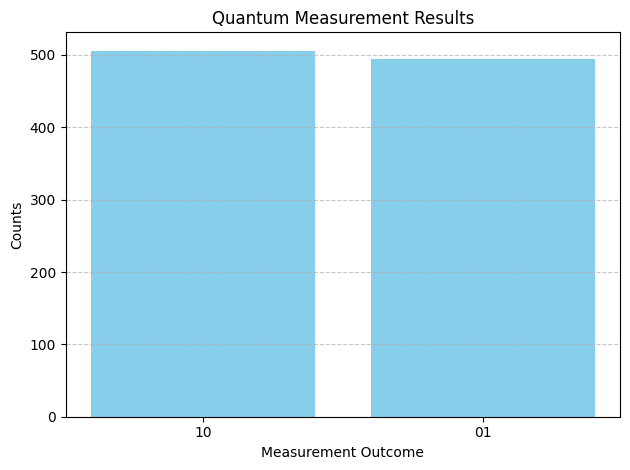

In [5]:
import matplotlib.pyplot as plt

# Prepare data
labels = list(counts.keys())
values = list(counts.values())

# Create the bar plot
plt.bar(labels, values, color='skyblue')
plt.xlabel('Measurement Outcome')
plt.ylabel('Counts')
plt.title('Quantum Measurement Results')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
#Draw the circuit
print(qc.draw())

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


# **Task 2: Entanglement Witness**
Build a circuit to test if two qubits are entangled:

Prepare a Bell state (|00⟩ + |11⟩)/√2.

Add a probabilistic error: With 20% chance, apply an X gate to one qubit.

Measure just one qubit 1000 times. Is the output random (50/50)? If not, the qubits are no longer entangled.

Goal: Show that entanglement breaks if you modify one qubit.

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # Correct import statement
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Create a circuit with 2 qubits and 1 classical bit (only measuring one qubit)
qc = QuantumCircuit(2, 1)

# Step 1: Create Bell state
qc.h(0)       # H gate on Qubit 0
qc.cx(0, 1)   # CX gate to entangle

# Step 2: Probabilistic X gate on Qubit 1 (20% chance)
prob = 0.2
if np.random.random() < prob:  # Random number < 0.2 means 20% chance
    qc.x(1)                    # Apply X gate to Qubit 1

# Step 3: Measure only Qubit 0
qc.measure(0, 0)

In [4]:
# Step 4: Simulate 1000 shots
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

# Step 5: Print and plot results
print("Counts for Qubit 0:", counts)
plot_histogram(counts)
plt.show()

# Optional: Draw the circuit
print(qc.draw())

Counts for Qubit 0: {'1': 488, '0': 512}
     ┌───┐          ┌─┐
q_0: ┤ H ├──■───────┤M├
     └───┘┌─┴─┐┌───┐└╥┘
q_1: ─────┤ X ├┤ X ├─╫─
          └───┘└───┘ ║ 
c: 1/════════════════╩═
                     0 


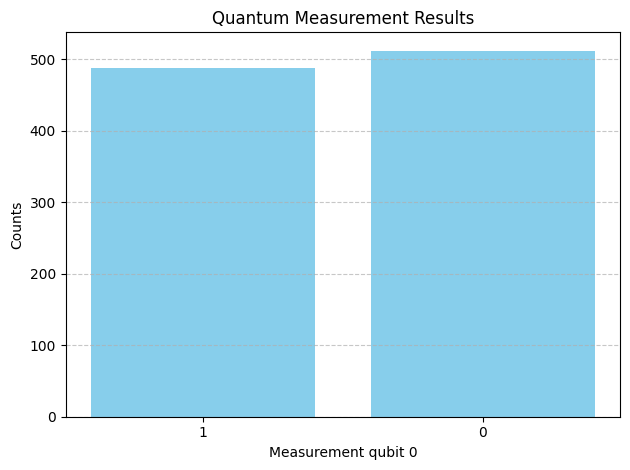

In [5]:
# Prepare data
labels = list(counts.keys())
values = list(counts.values())

# Create the bar plot
plt.bar(labels, values, color='skyblue')
plt.xlabel('Measurement qubit 0')
plt.ylabel('Counts')
plt.title('Quantum Measurement Results')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# **Task 3: Opposite-Measurement Entanglement**
Goal: Create a circuit where two qubits are entangled such that measuring one always gives the opposite result of the other (e.g., if Qubit 0 is 0, Qubit 1 must be 1, and vice versa).

**Expected Output**

After 1000 shots, the histogram should show only 01 and 10 (never 00 or 11).

In [6]:
# Create circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 1: X on Qubit 1 to start with |1>
qc.x(1)

# Step 2: H on Qubit 0 for superposition
qc.h(0)

# Step 3: CX to entangle (Qubit 0 controls, Qubit 1 target)
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

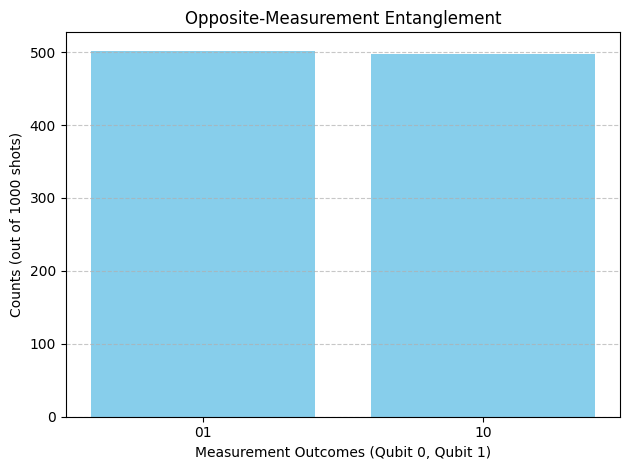

In [7]:
# Step 5: Simulate 1000 shots
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1000)
counts = job.result().get_counts()

# Step 6: Plot using your bar plot
labels = list(counts.keys())
values = list(counts.values())
plt.bar(labels, values, color='skyblue')
plt.xlabel('Measurement Outcomes (Qubit 0, Qubit 1)')
plt.ylabel('Counts (out of 1000 shots)')
plt.title('Opposite-Measurement Entanglement')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# Print counts and circuit
print("Counts:", counts)
print(qc.draw())

Counts: {'01': 502, '10': 498}
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


# **Task 4: Quantum Coin Flip Game**
Simulate a game where:

Alice prepares a qubit in |+⟩ and sends it to Bob.

Bob randomly chooses to measure it in the X-basis (|+⟩/|-⟩) or Z-basis (|0⟩/|1⟩).

If Bob measures |+⟩ or |0⟩, he wins; else, Alice wins.

Run 500 trials and calculate the win rates.

Twist: Let Bob entangle his measurement choice with another qubit. Does this change the odds?

In [10]:
# without entanglement pure game
# Simulate 500 trials
bob_wins = 0
alice_wins = 0
trials = 500

simulator = Aer.get_backend('qasm_simulator')

for _ in range(trials):
    # Alice prepares qubit in |+>
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # |0> -> |+>

    # Bob randomly chooses basis
    if np.random.random() < 0.5:  # 50% Z-basis
        qc.measure(0, 0)  # Measure in Z-basis
    else:  # 50% X-basis
        qc.h(0)  # H to switch to Z-basis equivalent
        qc.measure(0, 0)

    # Run 1 shot
    job = simulator.run(qc, shots=1)
    result = job.result().get_counts()
    outcome = list(result.keys())[0]

    # Determine winner
    if outcome == '0':  # |0> (Z) or |+> (X)
        bob_wins += 1
    else:  # |1> (Z) or |-> (X)
        alice_wins += 1

Bob wins: 355 (71.0%)
Alice wins: 145 (29.0%)


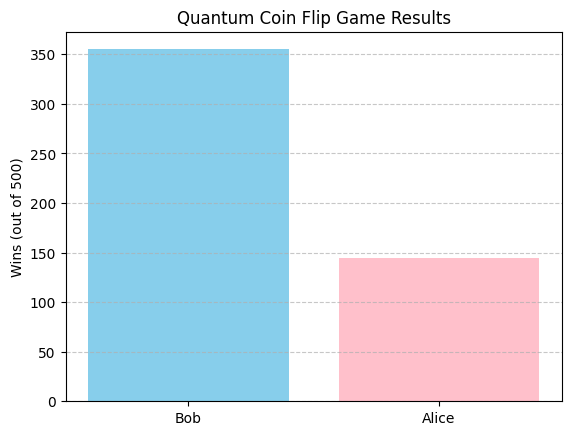

In [11]:
# Calculate win rates
bob_rate = bob_wins / trials * 100
alice_rate = alice_wins / trials * 100

print(f"Bob wins: {bob_wins} ({bob_rate:.1f}%)")
print(f"Alice wins: {alice_wins} ({alice_rate:.1f}%)")

# Bar plot
labels = ['Bob', 'Alice']
values = [bob_wins, alice_wins]
plt.bar(labels, values, color=['skyblue', 'pink'])
plt.ylabel('Wins (out of 500)')
plt.title('Quantum Coin Flip Game Results')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
#with entanglment
bob_wins = 0
alice_wins = 0

for _ in range(trials):
    qc = QuantumCircuit(2, 2)
    # Alice: q_0 in |+>
    qc.h(0)
    # Bob: q_1 for choice, in |+>
    qc.h(1)
    qc.measure(1, 1)  # Measure choice qubit

    # Simulate first measurement
    job = simulator.run(qc, shots=1)
    choice = list(job.result().get_counts().keys())[0][0]  # q_1 outcome

    # New circuit with q_0 still in |+>
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    if choice == '0':  # Z-basis
        qc.measure(0, 0)
    else:  # X-basis
        qc.h(0)
        qc.measure(0, 0)

    # Run q_0 measurement
    job = simulator.run(qc, shots=1)
    outcome = list(job.result().get_counts().keys())[0]

    # Winner
    if outcome == '0':
        bob_wins += 1
    else:
        alice_wins += 1

Twist - Bob wins: 372 (74.4%)
Twist - Alice wins: 128 (25.6%)


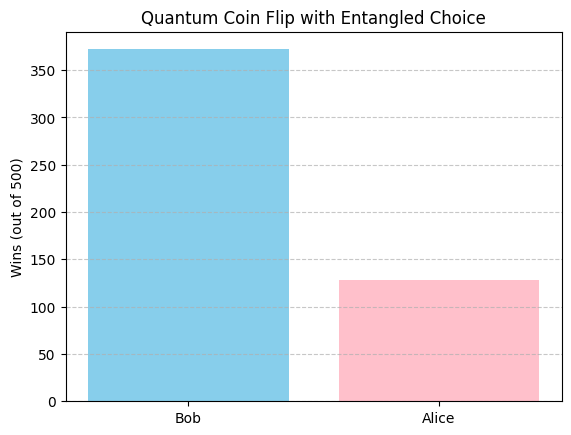

In [13]:
# Results
bob_rate = bob_wins / trials * 100
alice_rate = alice_wins / trials * 100
print(f"Twist - Bob wins: {bob_wins} ({bob_rate:.1f}%)")
print(f"Twist - Alice wins: {alice_wins} ({alice_rate:.1f}%)")

# Plot
plt.bar(['Bob', 'Alice'], [bob_wins, alice_wins], color=['skyblue', 'pink'])
plt.ylabel('Wins (out of 500)')
plt.title('Quantum Coin Flip with Entangled Choice')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Essay Question

Explain how entanglement and superposition enable quantum speedups, using examples from the tasks above (e.g., Task 1’s forced superposition or Task 2’s Bell state). Why can’t classical systems replicate this behavior?

## Quantum Speedups from Entanglement & Superposition

**Superposition:** Lets qubits be in multiple states at once (e.g., Task 1’s |+⟩), processing all possibilities in parallel—classical bits handle one state at a time, needing separate runs.

**Entanglement:** Links qubits instantly (e.g., Task 2’s Bell state), creating correlations without recomputing—classical systems require communication or sampling, slowing them down.

**Example:** Task 1 entangles Qubit 0 (|+⟩) and Qubit 1 (|1⟩) into $\frac{|01\rangle + |10\rangle}{\sqrt{2}}$ in one step; classically, you’d test both cases separately.

**Why Classical Can’t:** No superposition (no parallelism) or entanglement (no instant links)—classical computers scale linearly or worse, while quantum exploits exponential state space.